# Eploratory Analysis for the final project

The purpose of this notebook is to make an exploratory analysis of the data for the final project, the idea is to find patterns and dicover information to complement a re-iterate over our defined questions in order to improve them and complement them.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
snacks_df = pd.read_csv('./datasets/snacks.csv', dtype = { 'client_id': str })
snacks_df['date'] = pd.to_datetime(snacks_df['date'], format = '%d/%m/%Y')

snacks_df.head()

,country_region,office_department_city,description,area_name,warehouse_id,warehouse_city,category_id,category_name,brand_id,price_type,...,client_name,point_of_sale_name,distributor,date,units,devolution_units,currency,sale_amount,sale_discount,sale_devolution
0,Centro,Ibague,IBAGUE 1,SALADO,85228.0,IBAGUE,CAT1,Producto de Extrusion,M01,REGULAR,...,NaN,NaN,Tiendas,2014-04-01,39600,0,COP,"493,529.00","-93,769.56",0
1,Sur,Cali,TULUA,EL PRINCIPE,85205.0,TULUA,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,2014-04-01,324,0,COP,"181,530.00","-32,675.40",0
2,Sur,Nariño,POPAYAN,MOTO CONQUISTA POPAYAN,85220.0,POPAYAN,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,2014-04-01,36,0,COP,"20,170.00","-4,437.40",0
3,Sur,Nariño,POPAYAN,MOTO CONQUISTA POPAYAN,85220.0,POPAYAN,CAT1,Producto de Extrusion,M01,REGULAR,...,NaN,NaN,Tiendas,2014-04-01,73200,0,COP,"91,227.00","-20,069.98",0
4,Norte,Bucaramanga,FLORIDA,REPOSO,85230.0,BUCARAMANGA,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,2014-04-01,3924,0,COP,"2,198,533.00","-395,736.97",0


**How many regions we have?**

In [6]:
snacks_df['country_region'].unique()

array([' Centro', ' Sur', ' Norte', 'Ventas al Exterior', 'Norte',
       'Centro', nan, 'Sur', 'Ventas Miscelaneas'], dtype=object)

**Trim the country region data**

In [7]:
def transform(x):
    if (isinstance(x, str)):
        return x.strip()
    else:
        return x

snacks_df['country_region'] = snacks_df['country_region'].map(transform)
snacks_df['country_region'].unique()

array(['Centro', 'Sur', 'Norte', 'Ventas al Exterior', nan,
       'Ventas Miscelaneas'], dtype=object)

**How many sales with nan are?**
**Why we don't have this data**

In [8]:
snacks_df['country_region'].isna().sum()

210

In [9]:
snacks_df[snacks_df['country_region'].isna()]['units'].sum()

459823

**How many sales records are from every region?**

In [10]:
snacks_df.groupby('country_region')['date'].count().reset_index(name = 'count')

,country_region,count
0,Centro,906192
1,Norte,1079789
2,Sur,1213737
3,Ventas Miscelaneas,6
4,Ventas al Exterior,1247


**How many sales unit records are from every region?**

In [11]:
snacks_df.groupby('country_region')['units'].sum().reset_index()

,country_region,units
0,Centro,6999182833
1,Norte,9080664266
2,Sur,11599349149
3,Ventas Miscelaneas,164580
4,Ventas al Exterior,148269657


**How many cities and departments we have?**

In [12]:
snacks_df['office_department_city'].unique()

array(['Ibague', 'Cali', 'Nariño', 'Bucaramanga', 'Barranquilla',
       'MedellinA', 'BogotaB', 'Pereira', 'Villavicencio', 'Cartagena',
       'Monteria', 'Cucuta', 'Valledupar', 'BogotaA', 'MedellinB',
       'Panama', 'Chile', 'Puerto Rico', nan, 'Costa Rica',
       'Estados Unidos', 'Republica Dominicana', 'Guatemala', 'No Aplica',
       'Peru'], dtype=object)

**How many warehouse cities we have?**

In [13]:
snacks_df['warehouse_city'].unique()

array(['IBAGUE', 'TULUA', 'POPAYAN', 'BUCARAMANGA', 'BARRANQUILLA', 'SUR',
       'NORTE', 'SANTA MARTA', 'AGUACHICA', 'PEREIRA', 'BUGA',
       'VILLAVICENCIO', 'CARTAGENA', 'SINCELEJO', 'CUCUTA', 'VALLEDUPAR',
       'ARMENIA', 'MONTERIA', 'NEIVA', 'ESPECIALES', 'TUNJA', 'SUBA',
       'BARRANCABERMEJA', 'NAL', 'PASTO', 'ZIPAQUIRA', 'PALMIRA',
       'NARIÑO', 'MANIZALES', 'BOGOTA', 'VIRTUAL', 'SAN ANDRES',
       'PRINCIPAL', 'ITAGUI', nan, 'ANDRÉS'], dtype=object)

**How many categories we have?**

In [14]:
snacks_df['category_name'].unique()

array(['Producto de Extrusion', 'Producto en Frituras',
       'Producto a base de Platano', 'Combinaciones Individuales',
       'Producto de Horno', 'Platanos a base de Harina', 'Otros',
       'Multiproductos', 'Producto a base de Tuberculo', nan],
      dtype=object)

**How many brands do we have?**

In [15]:
snacks_df['brand_id'].unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18',
       'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27',
       'M28', 'Otras'], dtype=object)

**How many clients we have?**

In [16]:
snacks_df['client_name'].unique()

array([nan, 'SUPERTIENDAS Y DROGUERIAS OLIMPICA S.A.',
       'CENCOSUD COLOMBIA S.A.', 'ALMACENES EXITO S.A.',
       'ALMACENES LA 14 S.A.', 'CADENA COMERCIAL OXXO COLOMBIA S A S',
       'MAKRO SUPERMAYORISTA S.A.S', 'COLOMBIANA DE COMERCIO S.A.',
       'CAJA COLOMBIANA DE SUBSIDIO FAMILIAR COLSUBSIDIO',
       'PRICESMART COLOMBIA S.A.S.', 'INVERCOMER DEL CARIBE SAS'],
      dtype=object)

**How many distributors do we have?**

In [54]:
snacks_df['distributor'].unique()

array(['Tiendas', 'Superficies Menores', 'Negocios Esp',
       'Grandes Superficies', 'Clientes Mayoristas', 'Venta en Calle',
       'Clientes Droguerias', 'Cadenas Medianas', 'Clientes Exterior',
       'Otros', nan], dtype=object)

**How many sales per distributor type**

In [59]:
snacks_df.groupby('distributor')['units'].sum().reset_index().sort_values('units')

,distributor,units
6,Otros,986409
0,Cadenas Medianas,70398822
1,Clientes Droguerias,71898074
2,Clientes Exterior,148271601
9,Venta en Calle,383347800
5,Negocios Esp,888935968
7,Superficies Menores,1141039311
3,Clientes Mayoristas,1234115251
4,Grandes Superficies,3230488265
8,Tiendas,20658412679


**How the sales quantity behave through time?**

In [17]:
snacks_df['year'] = snacks_df['date'].map(lambda x: x.year)

In [18]:
snacks_df['month'] = snacks_df['date'].map(lambda x: x.month)

In [19]:
data = snacks_df.groupby(['year', 'month'])['units'].sum().reset_index()

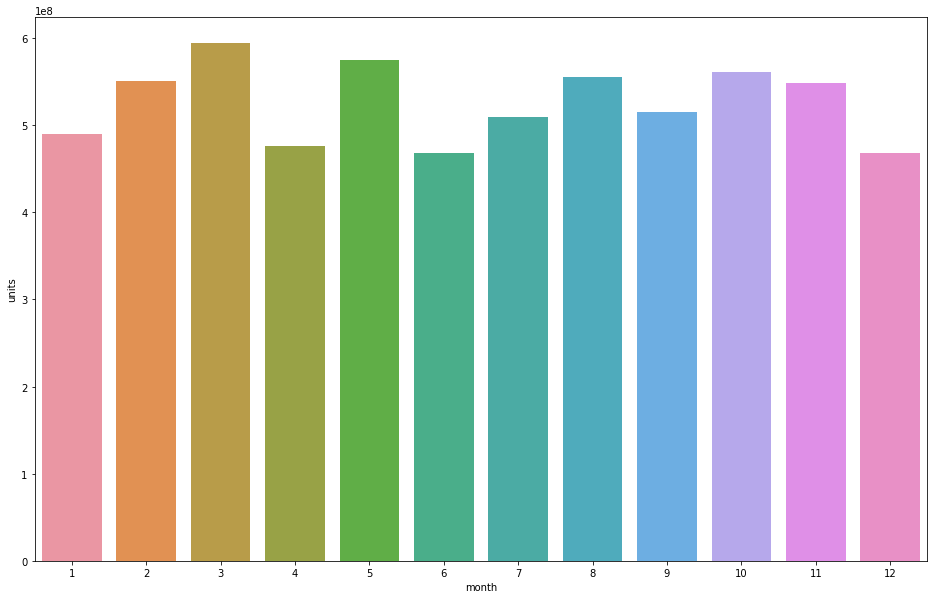

In [20]:
plt.figure(figsize = (16, 10))
sns.barplot(x = 'month', y = 'units', data = data[data['year'] == 2017])

**Distribution of sales units**

/Users/juanprq/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


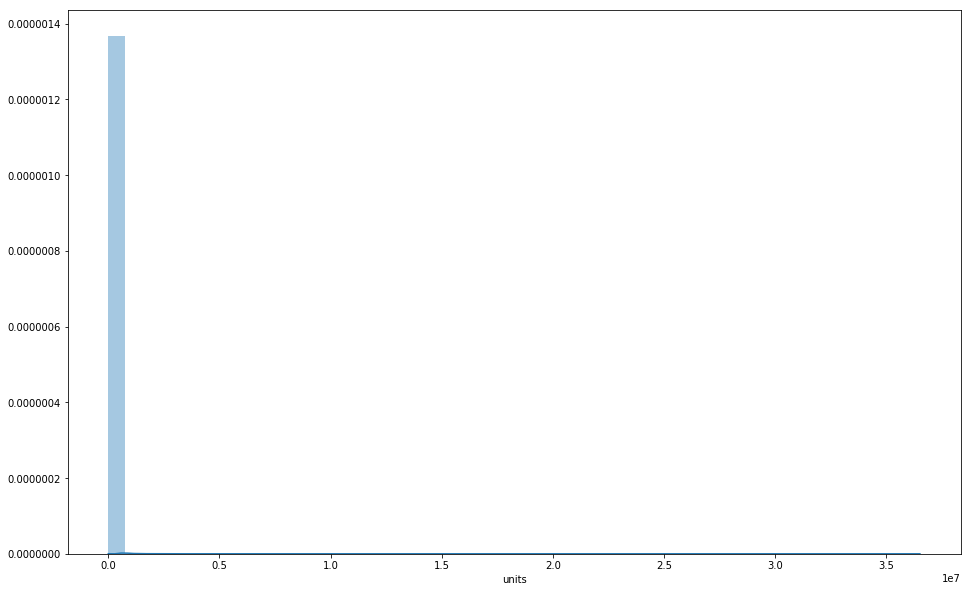

In [21]:
plt.figure(figsize = (16, 10))
sns.distplot(snacks_df['units'])

/Users/juanprq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


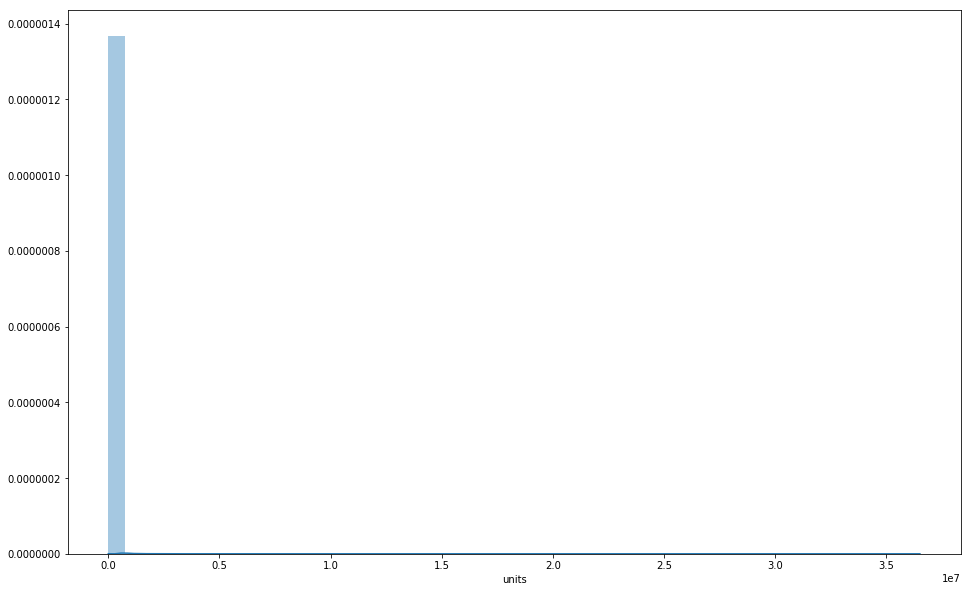

In [23]:
x = snacks_df[snacks_df['country_region'].notna()][snacks_df['country_region'] != 'Ventas al Exterior']['units']

plt.figure(figsize = (16, 10))
sns.distplot(x)

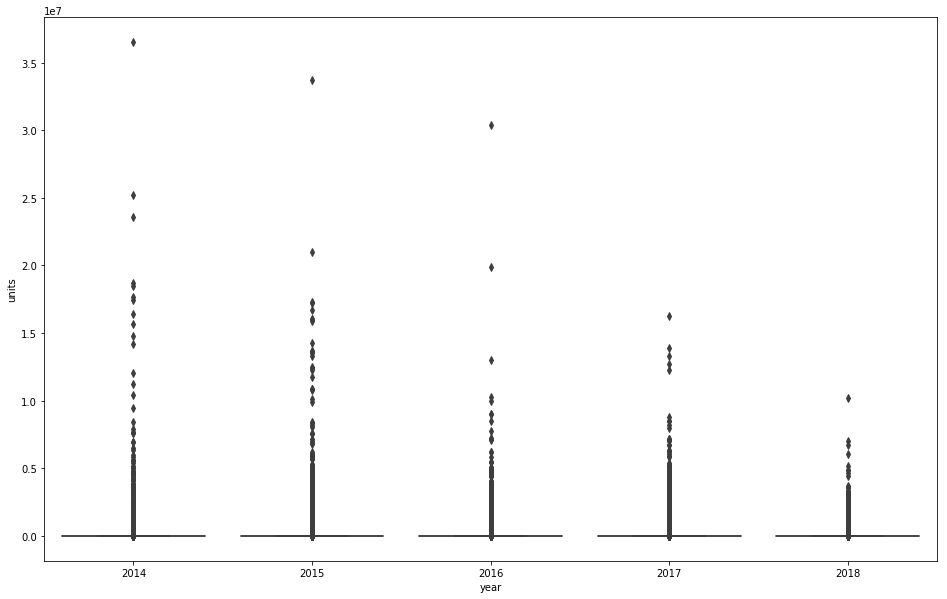

In [49]:
plt.figure(figsize = (16, 10))
sns.boxplot(x = 'year', y = 'units', data = snacks_df)

/Users/juanprq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


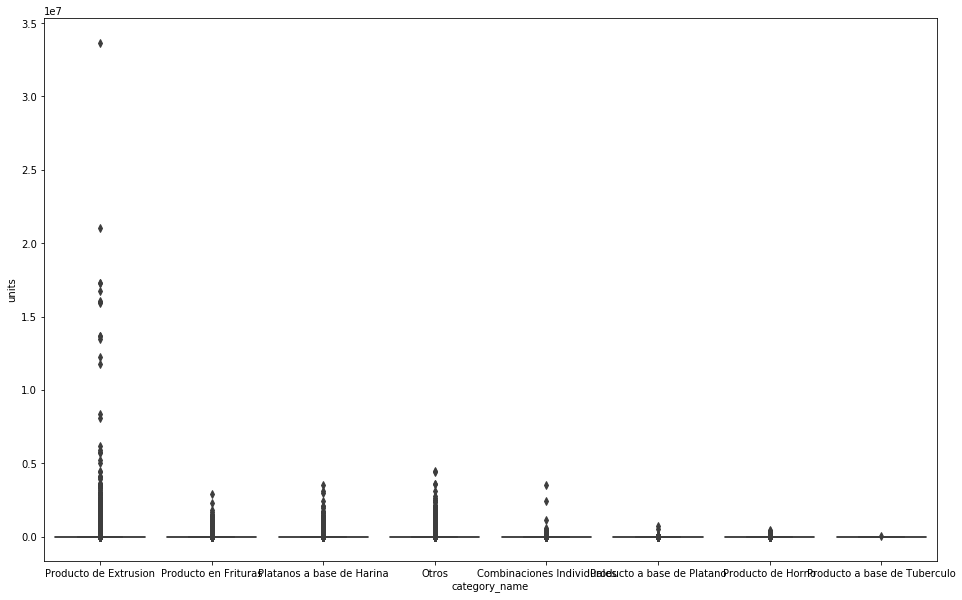

In [37]:
test = snacks_df[snacks_df['country_region'].notna()][snacks_df['country_region'] == 'NI orte'][snacks_df['year'] == 2015]

plt.figure(figsize = (16, 10))
sns.boxplot(x = 'category_name', y = 'units', data = test)

Trying an approach that deals with outliers

/Users/juanprq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


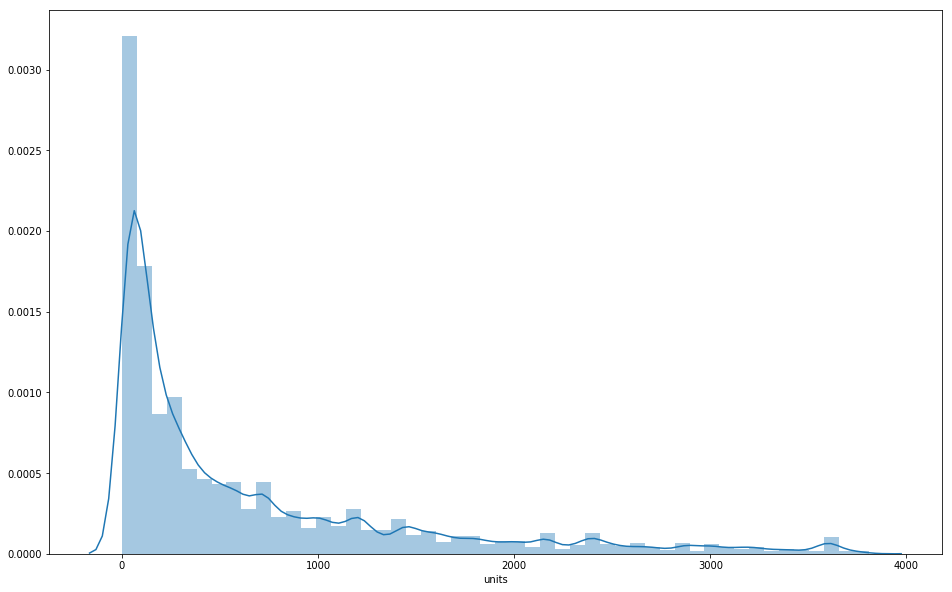

In [46]:
# Snacks from the north in 2015
x = snacks_df[snacks_df['country_region'] == 'Norte'][snacks_df['year'] == 2015]

Q1 = x['units'].quantile(0.25)
Q3 = x['units'].quantile(0.75)
IQR = Q3 - Q1

filtered = x.query('(@Q1 - 1.5 * @IQR) <= units <= (@Q3 + 1.5 * @IQR)')
plt.figure(figsize = (16, 10))
sns.distplot(filtered['units'])

**There are any records with 0 of units?**

In [50]:
snacks_df[snacks_df['units'] == 0].head()

,country_region,office_department_city,description,area_name,warehouse_id,warehouse_city,category_id,category_name,brand_id,price_type,...,distributor,date,units,devolution_units,currency,sale_amount,sale_discount,sale_devolution,year,month
162,Sur,Cali,AUTOSERVICIOS CALI,AUTOSERVICIOS CALI,85201.0,NORTE,CAT1,Producto de Extrusion,M01,OFERTADO,...,Grandes Superficies,2014-04-01,0,108,COP,0,0,-608,2014,4
342,Sur,Pereira,INSTITUCIONAL PEREIRA,INSTITUCIONAL PEREIRA,85225.0,PEREIRA,CAT1,Producto de Extrusion,M01,REGULAR,...,Superficies Menores,2014-04-01,0,216,COP,0,0,"-1,286.00",2014,4
356,Norte,Bucaramanga,AUTOSERVICIOS BUCARAMANGA,AUTOSERVICIOS BUCARAMANGA,85230.0,BUCARAMANGA,CAT1,Producto de Extrusion,M01,REGULAR,...,Superficies Menores,2014-04-01,0,108,COP,0,0,-612,2014,4
386,Centro,Villavicencio,AUTOSERVICIOS VILLAVICENCIO,AUTOSERVICIOS VILLAVICENCIO,85211.0,VILLAVICENCIO,CAT1,Producto de Extrusion,M01,REGULAR,...,Grandes Superficies,2014-04-01,0,2160,COP,0,0,"-40,608.00",2014,4
397,Sur,Cali,AUTOSERVICIOS CALI,AUTOSERVICIOS CALI,85201.0,NORTE,CAT1,Producto de Extrusion,M01,REGULAR,...,Superficies Menores,2014-04-01,0,180,COP,0,0,"-11,574.00",2014,4


In [53]:
snacks_df[(snacks_df['units'] > 0) & (snacks_df['devolution_units'] > 0)].head()

,country_region,office_department_city,description,area_name,warehouse_id,warehouse_city,category_id,category_name,brand_id,price_type,...,distributor,date,units,devolution_units,currency,sale_amount,sale_discount,sale_devolution,year,month
10,Sur,Cali,AUTOSERVICIOS CALI,AUTOSERVICIOS CALI,85201.0,NORTE,CAT1,Producto de Extrusion,M01,OFERTADO,...,Superficies Menores,2014-04-01,100,40,COP,"73,280.00","-10,992.00","-29,312.00",2014,4
68,Norte,Monteria,AUTOSERVICIOS MONTERIA,AUTOSERVICOS MONTERIA,85235.0,MONTERIA,CAT1,Producto de Extrusion,M01,OFERTADO,...,Grandes Superficies,2014-04-01,320,500,COP,"23,450.00","-4,689.92","-3,664.00",2014,4
75,Norte,Cartagena,AUTOSERVICIOS CARTAGENA,AUTOSERVICIOS CARTAGENA,85224.0,CARTAGENA,CAT1,Producto de Extrusion,M01,OFERTADO,...,Grandes Superficies,2014-04-01,160,20,COP,"117,248.00","-23,449.60","-14,656.00",2014,4
86,Norte,Valledupar,VENTA AL PASO VALLEDUPAR,VENTA AL PASO VALLEDUPAR,85233.0,VALLEDUPAR,CAT1,Producto de Extrusion,M01,REGULAR,...,Grandes Superficies,2014-04-01,1200,240,COP,"225,600.00","-33,840.00","-45,120.00",2014,4
144,Sur,MedellinA,AUTOSERVICIOS MEDELLIN,AUTOSERVICIOS MEDELLIN,85206.0,SUR,CAT1,Producto de Extrusion,M01,REGULAR,...,Grandes Superficies,2014-04-01,1920,720,COP,"360,960.00","-54,144.00","-135,360.00",2014,4


Let's try a simple for all removing outliers

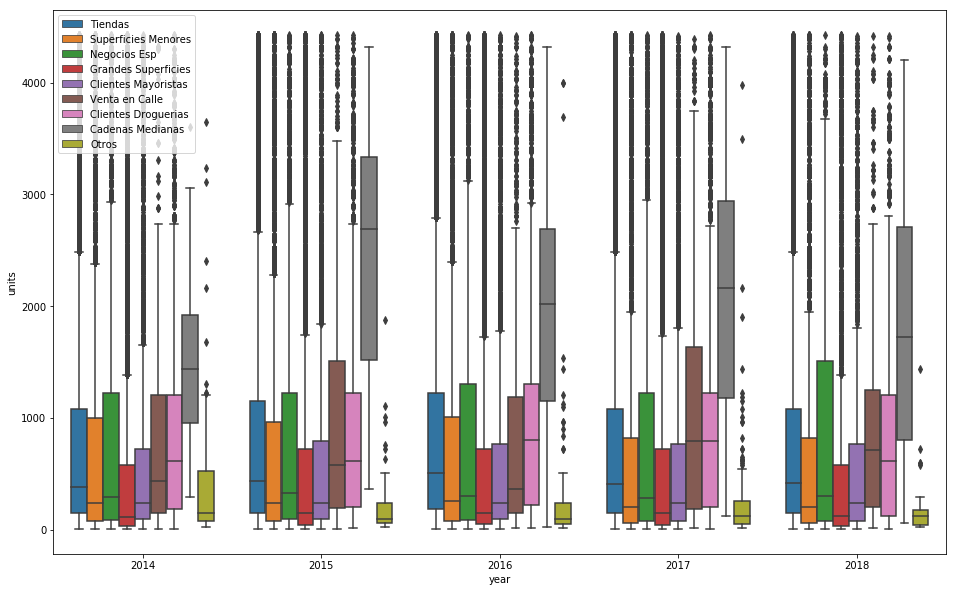

In [71]:
x = snacks_df[
    (snacks_df['country_region'].notna()) &
    (snacks_df['country_region'] != 'Ventas al Exterior') &
    (snacks_df['units'] > 0)
]

Q1 = x['units'].quantile(0.25)
Q3 = x['units'].quantile(0.75)
IQR = Q3 - Q1

filtered = x.query('(@Q1 - 1.5 * @IQR) <= units <= (@Q3 + 1.5 * @IQR)')
plt.figure(figsize = (16, 10))
sns.boxplot(data = filtered, x = 'year', y = 'units', hue = 'distributor')
plt.legend(loc = 'upper left')

How can we view a distributor distribution

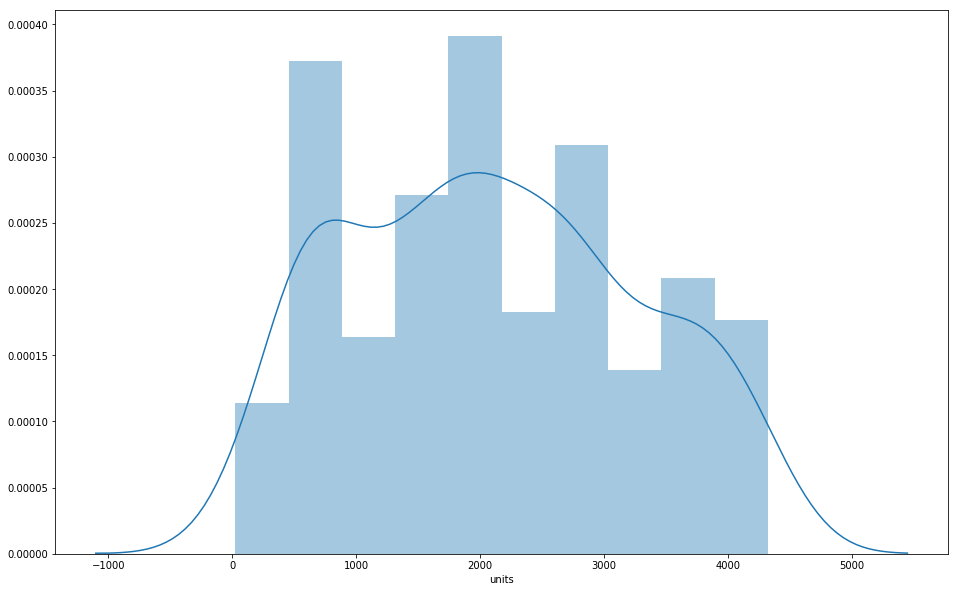

In [82]:
x = filtered[filtered['distributor'] == 'Cadenas Medianas']

plt.figure(figsize = (16, 10))
sns.distplot(x['units'], bins = 5) # test with least bins, and more

I want to calculate the sum of units sales by month in the time by type of distributor

/Users/juanprq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

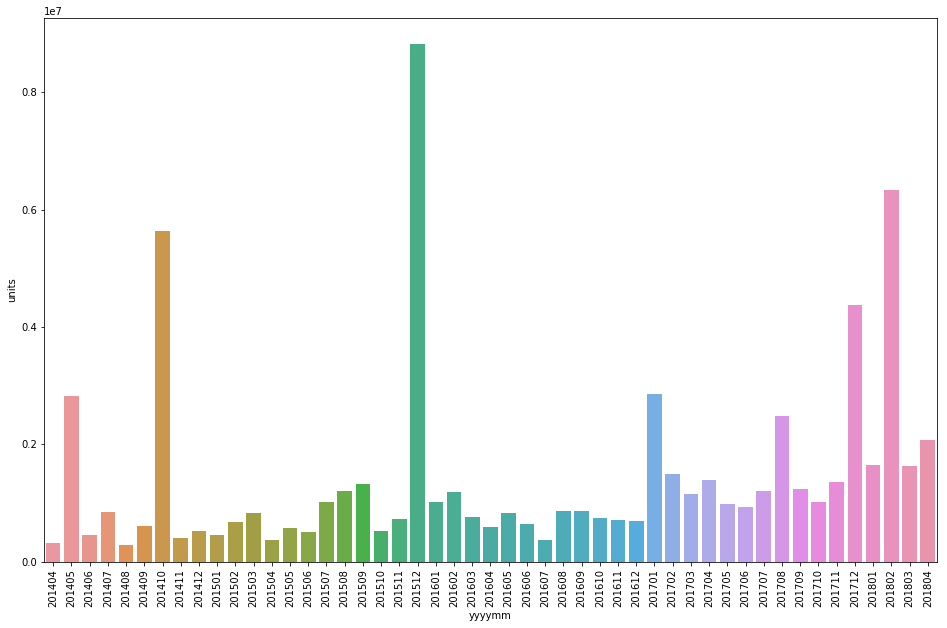

In [92]:
x = snacks_df[
    (snacks_df['country_region'].notna()) &
    (snacks_df['country_region'] != 'Ventas al Exterior') &
    (snacks_df['units'] > 0) &
    (snacks_df['distributor'] == 'Cadenas Medianas')
]

x['yyyymm'] = x['date'].map(lambda x: x.strftime('%Y%m'))
grouping = x.groupby('yyyymm')['units'].sum().reset_index()
plt.figure(figsize = (16, 10))
sns.barplot(x = 'yyyymm', y = 'units', data = grouping)
plt.xticks(rotation = 90)

dates that stores bought a lot of product.

Does this makes sense?

/Users/juanprq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


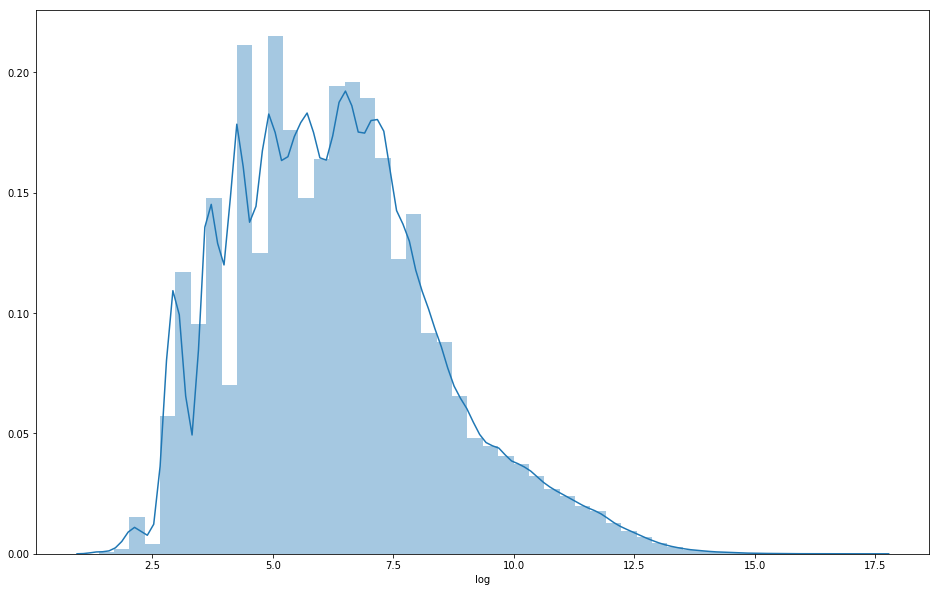

In [99]:
x = snacks_df[snacks_df['country_region'] != 'Ventas al Exterior'][snacks_df['year'] == 2015][snacks_df['units'] > 0]

x['log'] = np. (x['units'])
plt.figure(figsize = (16, 10))
sns.distplot(x['log'])

What we identified is that there are some basic features that we should have into mind in order to segment the data and analyze it better

    * country_region
    * year
    * month
    * distributor
    * category_name
   
Also i suspect that this are also features that help us to segment the date:

    * price_type
    * return? (if the return units it's more than 0, this doesn't exists right now)
    * flavor

Count by month for every year, sales units of cadenas medianas

/Users/juanprq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


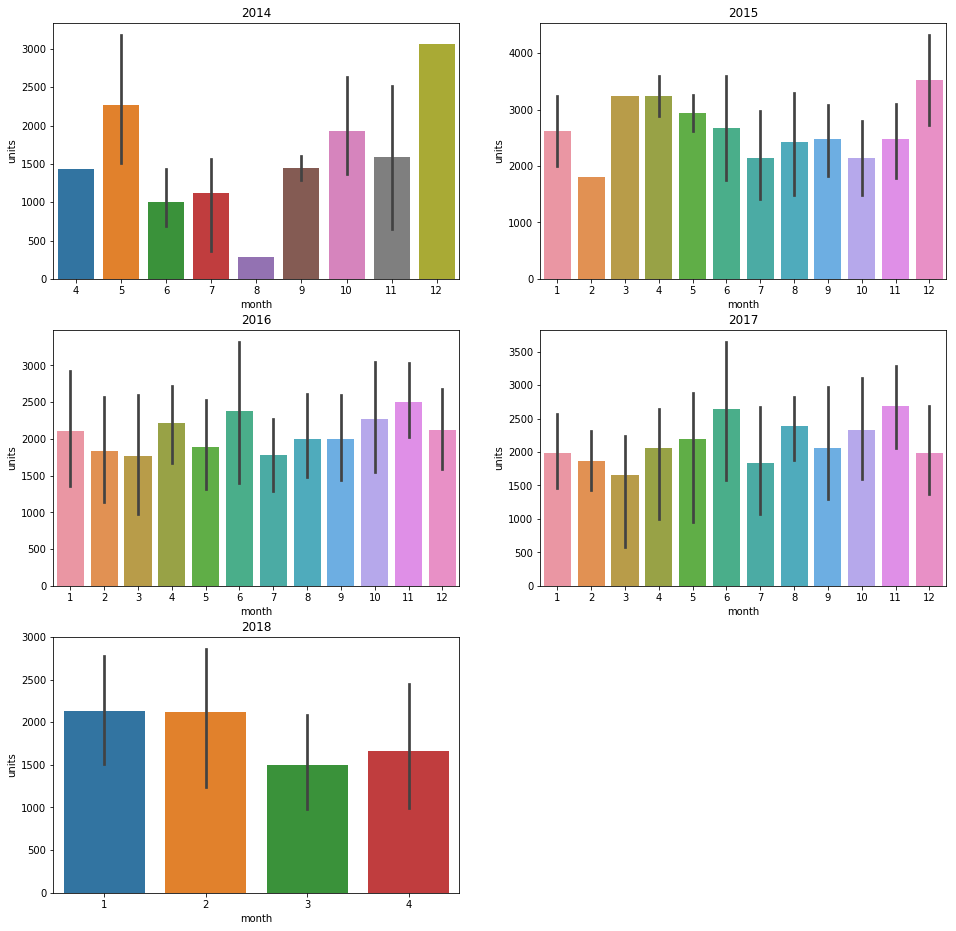

In [124]:
x = filtered[filtered['distributor'] == 'Cadenas Medianas']
x['yyyymm'] = x['date'].map(lambda x: x.strftime('%Y%m'))

fig = plt.figure(figsize = (16, 16))

for i, year in enumerate(x['year'].unique()):
    fig.add_subplot(3, 2, i + 1)
    aux = x[x['year'] == year]
    sns.barplot(data = aux, x = 'month', y = 'units').set_title(year)

# sw peonro agrupar bimestral o trimestral

SI tener un incentivo hace que se compre mas
Sera que hay empresas que usan mucho la devolucion de producto ().
QUe tipo de producto son problematicos para devoluciones
Hay tipos de productos en diferentes marcas? por que puede pasar esto? a quien le compran mas?